In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math 
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
dataframe =pd.read_excel('input.xlsx')
dataframe

,S.No.,H/T,ὠ(rps),D/T,r/R,z/H
0,1,0.6,5.0,0.5,0.000000,0.795000
1,2,0.6,5.0,0.5,0.042945,0.825000
2,3,0.6,5.0,0.5,0.089982,0.830000
3,4,0.6,5.0,0.5,0.124745,0.850000
4,5,0.6,5.0,0.5,0.169736,0.875000
...,...,...,...,...,...,...
773,774,1.3,15.0,0.6,0.774100,0.967359
774,775,1.3,15.0,0.6,0.821736,1.026706
775,776,1.3,15.0,0.6,0.885254,1.097922
776,777,1.3,15.0,0.6,0.960676,1.121661


In [35]:
dataframe_input = dataframe.iloc[:,[0,1,2,3,4]]
dataframe_output = dataframe.iloc[:,[0,5]]
train_input, train_output = dataframe_input.loc[dataframe_input['S.No.'] % 3 !=0],dataframe_output.loc[dataframe_output['S.No.'] % 3 !=0]
test_input, test_output = dataframe_input.loc[dataframe_input['S.No.'] % 3 ==0],dataframe_output.loc[dataframe_output['S.No.'] % 3 ==0]
train_input, train_output = train_input.iloc[:,[1,2,3,4]],train_output.iloc[:,[1]]
test_input, test_output = test_input.iloc[:,[1,2,3,4]],test_output.iloc[:,[1]]

In [36]:
scaler = StandardScaler()
print(scaler.fit(train_input))
scaler.transform(train_input)
scaler.transform(test_input)

StandardScaler(copy=True, with_mean=True, with_std=True)


array([[-1.50402433, -1.29245148, -0.94926229, -1.13601595],
       [-1.50402433, -1.29245148, -0.94926229, -0.67235105],
       [-1.50402433, -1.29245148, -0.94926229, -0.19371004],
       ...,
       [ 1.0288271 ,  1.81076664,  1.05344962,  0.6883756 ],
       [ 1.0288271 ,  1.81076664,  1.05344962,  1.36586642],
       [ 1.0288271 ,  1.81076664,  1.05344962,  2.04818852]])

In [37]:
reg = LinearRegression().fit(train_input, train_output)
reg.score(train_input, train_output)

0.7956697973494837

In [38]:
predicted = reg.predict(test_input)


array([[0.76656555],
       [0.85031933],
       [0.93677831],
       [1.06106144],
       [1.23938371],
       [0.68646303],
       [0.76642461],
       [0.85007481],
       [0.95341003],
       [1.13301265],
       [0.62325921],
       [0.66784333],
       [0.76105618],
       [0.86237451],
       [1.03056292],
       [0.51903586],
       [0.59424211],
       [0.68164397],
       [0.77107843],
       [0.88896932],
       [1.07190344],
       [0.49930817],
       [0.59252103],
       [0.67560205],
       [0.77286764],
       [0.93295059],
       [0.66328362],
       [0.74636465],
       [0.85578844],
       [0.96521222],
       [1.09084694],
       [0.59139079],
       [0.6854694 ],
       [0.75909614],
       [0.82249694],
       [0.88998812],
       [0.99838304],
       [0.51906487],
       [0.61634261],
       [0.68929181],
       [0.78858376],
       [0.89192845],
       [1.01351044],
       [0.44673894],
       [0.54945348],
       [0.64008396],
       [0.72870042],
       [0.797

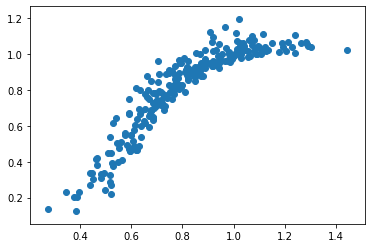

In [42]:
plt.scatter(predicted,test_output)
plt.show()

In [60]:
regr = MLPRegressor(activation='relu',hidden_layer_sizes=(1000,4), max_iter=1000).fit(train_input, train_output)

D:\pythonide\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
predicted_nn = regr.predict(test_input)

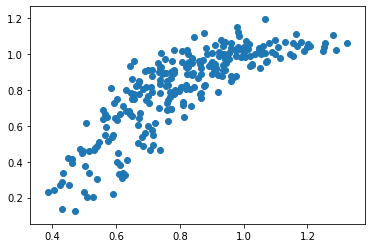

In [61]:
plt.scatter(predicted_nn,test_output)
plt.show()

In [66]:
from tensorflow import keras


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [82]:
input_shape = (4,)
model = Sequential()
model.add(Dense(4, input_shape=input_shape, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

In [83]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(train_input,train_output, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

Epoch 1/100
42/42 [==============================] - 0s 3ms/step - loss: 0.3053 - mean_squared_error: 0.1336 - val_loss: 0.3402 - val_mean_squared_error: 0.1746
Epoch 2/100
42/42 [==============================] - 0s 1ms/step - loss: 0.2436 - mean_squared_error: 0.0855 - val_loss: 0.3037 - val_mean_squared_error: 0.1437
Epoch 3/100
42/42 [==============================] - 0s 1ms/step - loss: 0.2154 - mean_squared_error: 0.0695 - val_loss: 0.2772 - val_mean_squared_error: 0.1237
Epoch 4/100
42/42 [==============================] - 0s 1ms/step - loss: 0.1896 - mean_squared_error: 0.0564 - val_loss: 0.2319 - val_mean_squared_error: 0.0927
Epoch 5/100
42/42 [==============================] - 0s 1ms/step - loss: 0.1610 - mean_squared_error: 0.0434 - val_loss: 0.2297 - val_mean_squared_error: 0.0918
Epoch 6/100
42/42 [==============================] - ETA: 0s - loss: 0.0962 - mean_squared_error: 0.01 - 0s 1ms/step - loss: 0.1341 - mean_squared_error: 0.0314 - val_loss: 0.1626 - val_mean_squa

42/42 [==============================] - 0s 1ms/step - loss: 0.0578 - mean_squared_error: 0.0064 - val_loss: 0.1130 - val_mean_squared_error: 0.0256
Epoch 52/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0592 - mean_squared_error: 0.0066 - val_loss: 0.1092 - val_mean_squared_error: 0.0216
Epoch 53/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0588 - mean_squared_error: 0.0067 - val_loss: 0.1160 - val_mean_squared_error: 0.0199
Epoch 54/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0578 - mean_squared_error: 0.0064 - val_loss: 0.1090 - val_mean_squared_error: 0.0199
Epoch 55/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0554 - mean_squared_error: 0.0060 - val_loss: 0.1137 - val_mean_squared_error: 0.0193
Epoch 56/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0561 - mean_squared_error: 0.0061 - val_loss: 0.1075 - val_mean_squared_error: 0.0212
Epoch 57/100
42/42 [=====================

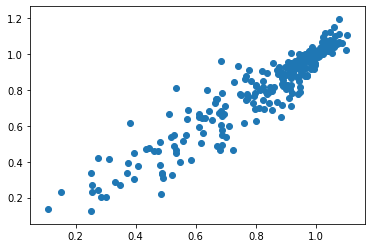

In [89]:
predicted_keras = model.predict(test_input)
predicted_keras
plt.scatter(predicted_keras,test_output)
